In [1]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
from transform import *

In [2]:
## pull data

b1_path = 'data/MS/FLD/part_b1/'
b2_path = 'data/MS/FLD/part_b2/'
b3_path = 'data/MS/FLD/part_b3/'

b1= get_osiris_quantity_1d(b1_path)
b1_0 = vysxd_get_data(f'{b1_path}part_b1-000000.h5') ##can use this for easy labeling

b2 = get_osiris_quantity_1d(b2_path)
b2_0 = vysxd_get_data(f'{b2_path}part_b2-000000.h5')

b3 = get_osiris_quantity_1d(b3_path)
b3_0 = vysxd_get_data(f'{b3_path}part_b3-000000.h5')


e1_path = 'data/MS/FLD/part_e1/'
e2_path = 'data/MS/FLD/part_e2/'
e3_path = 'data/MS/FLD/part_e3/'

e1 = get_osiris_quantity_1d(e1_path)
e1_0 = vysxd_get_data(f'{e1_path}part_e1-000000.h5') ##can use this for easy labeling

e2 = get_osiris_quantity_1d(e2_path)
e2_0 = vysxd_get_data(f'{e2_path}part_e2-000000.h5')

e3 = get_osiris_quantity_1d(e3_path)
e3_0 = vysxd_get_data(f'{e3_path}part_e3-000000.h5')

e_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
e_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')

i_density = get_osiris_quantity_1d('data/MS/DENSITY/ions/charge/')
i_density_0 = vysxd_get_data('data/MS/DENSITY/ions/charge/charge-ions-000000.h5')


In [3]:
e_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
e_ufl1_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')

i_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/ions/ufl1/')
i_ufl1_0 = vysxd_get_data('data/MS/UDIST/ions/ufl1/ufl1-ions-000000.h5')

dt, dx, t, x = e_ufl1[1], e_ufl1[2], e_ufl1[3], e_ufl1[4]

In [24]:
# Define useful bounds for your box

xmin = 5; xmax = 100; tmin = 700;tmax =797; v=.135

if not (os.path.isdir('avg_q')):
    os.makedirs('avg_q')

/home/david/schaeffer/rqm10_B.4_ufl.2_large/../vysxd/transform.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


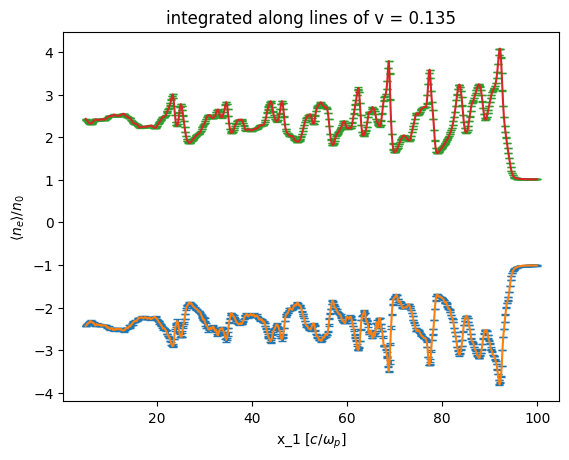

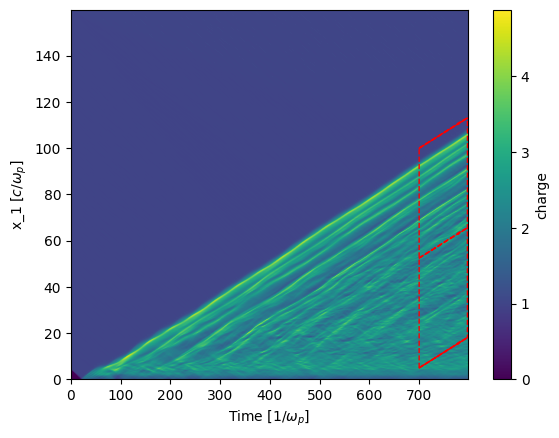

In [25]:
# Integrate quantities and then write them to .npy files to save yourself time in the future
e_density_integrated = box_integrate(q=e_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e_density_0, plot_flag=True)
i_density_integrated = box_integrate(q=i_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=i_density_0, plot_flag=True)

plt.ylabel(r'$\langle n_e \rangle /n_0$')

illustrate_box(q=i_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = e_density_0)

In [26]:
np.save("avg_q/"+"i_density",i_density_integrated)
np.save("avg_q/"+"e_density",e_density_integrated)

Now do the same for all the rest of your quantities. It will make your analysis much faster in the future

In [27]:
eprime, bprime = field_transform(v= v,e_=[e1[0],e2[0],e3[0]],b_=[b1[0],b2[0],b3[0]])

b1_integrated = box_integrate(q=[bprime[0],b1[1],b1[2],b1[3],b1[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
b2_integrated = box_integrate(q=[bprime[1],b2[1],b2[2],b2[3],b2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
b3_integrated = box_integrate(q=[bprime[2],b3[1],b3[2],b3[3],b3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)

e1_integrated = box_integrate(q=[eprime[0],e1[1],e1[2],e1[3],e1[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
e2_integrated = box_integrate(q=[eprime[1],e2[1],e2[2],e2[3],e2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
e3_integrated = box_integrate(q=[eprime[2],e3[1],e3[2],e3[3],e3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)

e_ufl1_integrated = box_integrate(q=e_ufl1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)

/home/david/schaeffer/rqm10_B.4_ufl.2_large/../vysxd/transform.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


In [28]:
i_ufl1_integrated = box_integrate(q=i_ufl1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"i_ufl1",i_ufl1_integrated)

In [29]:
np.save("avg_q/"+"b1",b1_integrated)
np.save("avg_q/"+"b2",b2_integrated)
np.save("avg_q/"+"b3",b3_integrated)


np.save("avg_q/"+"e1",e1_integrated)
np.save("avg_q/"+"e2",e2_integrated)
np.save("avg_q/"+"e3",e3_integrated)

np.save("avg_q/"+"e_ufl1",e_ufl1_integrated)

In [31]:
# Do the same for flow velocity in y and z, though these quantities should be negligable

e_ufl2 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl2/')
e_ufl2_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl2/ufl2-electrons-000000.h5')
e_ufl2_integrated = box_integrate(q=e_ufl2,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"e_ufl2",e_ufl2_integrated)

e_ufl3 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl3/')
e_ufl3_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl3/ufl3-electrons-000000.h5')
e_ufl3_integrated = box_integrate(q=e_ufl3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"e_ufl3",e_ufl3_integrated)

FileNotFoundError: [Errno 2] No such file or directory: 'data/MS/UDIST/electrons/ufl2/'

In [ ]:
i_ufl2 = get_osiris_quantity_1d('data/MS/UDIST/ions/ufl2/')
i_ufl2_0 = vysxd_get_data('data/MS/UDIST/ions/ufl2/ufl2-ions-000000.h5')
i_ufl2_integrated = box_integrate(q=i_ufl2,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"i_ufl2",i_ufl2_integrated)

i_ufl3 = get_osiris_quantity_1d('data/MS/UDIST/ions/ufl3/')
i_ufl3_0 = vysxd_get_data('data/MS/UDIST/ions/ufl3/ufl3-ions-000000.h5')
i_ufl3_integrated = box_integrate(q=i_ufl3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, plot_flag=False)
np.save("avg_q/"+"i_ufl3",i_ufl3_integrated)

/home/david/schaeffer/rqm10_B.4_ufl.2/../vysxd/transform.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)
/home/david/schaeffer/rqm10_B.4_ufl.2/../vysxd/transform.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


In [ ]:
test = np.load("avg_q/e_density.npy")

In [44]:
p1x1_e = get_osiris_quantity_2d("data/MS/PHA/p1x1/electrons/")
p1x1_i = get_osiris_quantity_2d("data/MS/PHA/p1x1/ions/")


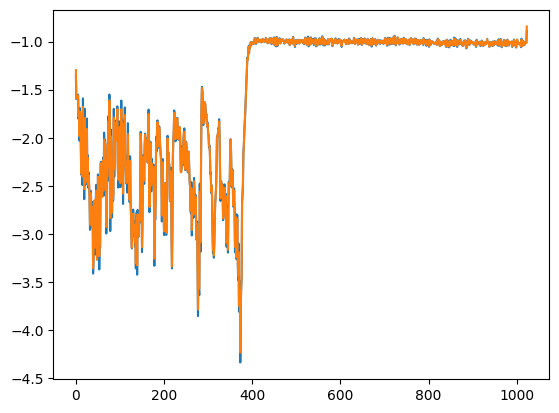

In [49]:
zeroth_moment = np.trapz(p1x1_e[0],axis=1)

plt.plot(zeroth_moment[300,:]/26)
plt.plot(e_density[0][300,:])

In [50]:
temperature_e = get_temperature(p1x1_e,e_ufl1)/-26
temperature_i = get_temperature(p1x1_i,i_ufl1)/26

/home/david/schaeffer/rqm10_B.4_ufl.2_large/../vysxd/transform.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


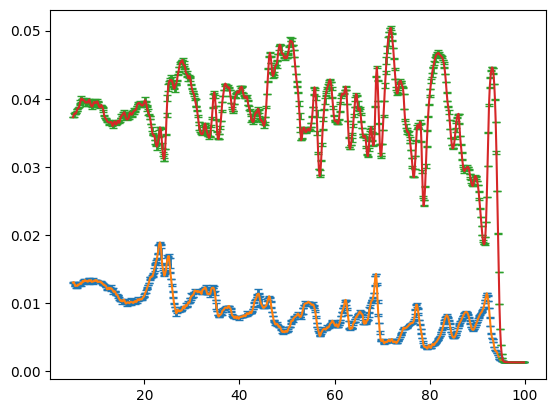

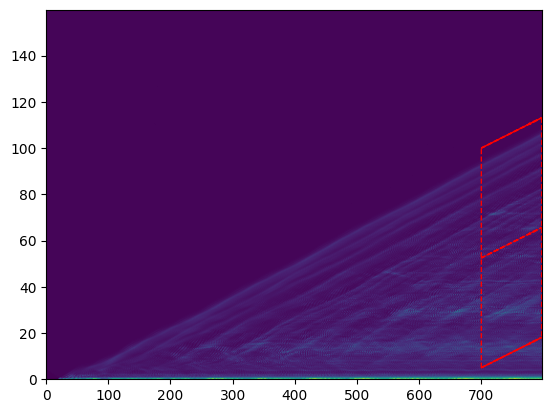

In [51]:

e_temp_ = box_integrate([temperature_e, dt, dx, t, x],xmin=xmin, xmax=xmax, tmin= tmin, tmax =tmax, v=v)
i_temp_ = box_integrate([temperature_i, dt, dx, t, x],xmin=xmin, xmax=xmax, tmin= tmin, tmax =tmax, v=v)
illustrate_box([temperature_e, dt, dx, t, x],xmin=xmin, xmax=xmax, tmin= tmin, tmax =tmax, v=v)

np.save("avg_q/"+"e_temp",e_temp_)
np.save("avg_q/"+"i_temp",i_temp_)